# Intro to Machine Learning

### Housing prices prediction

In [155]:
import pandas as pd
import numpy as np
import glob
import datetime
import matplotlib.pyplot as plt

In [156]:
# ## load electrical demand data
# df_load = pd.concat([pd.read_excel(filename, sheet_name= "DUQ")[["DATE", "MAX"]] for filename in glob.glob("*-hourly-loads.xls")], ignore_index=True)
# df_load = df_load.loc[(df_load['DATE'] > '8/1/2017') & (df_load['DATE'] <= '8/30/2017')]
# print(df_load.head())
# print(df_load.dtypes)

# # Load weather and get maximum by day
# df_weather = pd.read_csv("pittsburgh_weather.csv")
# df_weather = df_weather[df_weather["Time"] != -9999]
# df_weather["Date"] = df_weather["Time"].apply(lambda x: str(x)[:8])
# # df_weather.head()
# df = df_weather.groupby("Date").max()[["OAT"]]
# df["Temp"] = df["OAT"].apply(lambda x: x/10. * (9/5) + 32)

# # join with load, then get just summer methods
# # df["Load"] = pd.Series(df_load["MAX"].values/1000, index=df.index)
# df.reset_index(level=0, inplace=True)
# df.rename(index=str, columns={"Date": "DATE"}, inplace=True)
# date1 = df["DATE"]
# df["DATE"] = pd.to_datetime(date1,format='%Y%m%d', errors='ignore').dt.strftime('%m/%d/%Y')
# print(df.head())
# print(df.dtypes)
# data = pd.merge(df_load,df,how='inner',on='DATE')
# data

In [157]:
data = pd.read_csv('housing.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [158]:
def normalize(x):
    return (x - min(x))/(max(x) - min(x))

columns_to_be_normalized = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']
for col in columns_to_be_normalized:
    data[col] = normalize(data[col].values)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,8.3252,452600.0,NEAR BAY
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,8.3014,358500.0,NEAR BAY
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,7.2574,352100.0,NEAR BAY
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,5.6431,341300.0,NEAR BAY
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,3.8462,342200.0,NEAR BAY


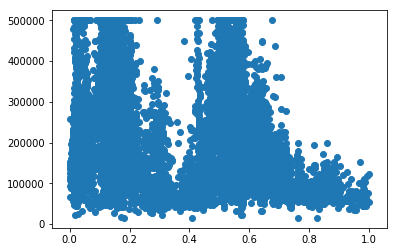

In [159]:
plt.scatter(data['latitude'], data['median_house_value'])

In [160]:
## gradient descent
y = data.median_house_value
x = data.latitude
theta = np.array([0., 0.])
alpha = 1.0
for t in range(101):
    if t % 10 == 0:
        print("Iteration {:3d}: ".format(t), theta)
    theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x  + theta[1] - y)* x)
    theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x  + theta[1] - y))

Iteration   0:  [0. 0.]
Iteration  10:  [-34131.06476409 203453.23488224]
Iteration  20:  [-60602.59870281 225885.56778819]
Iteration  30:  [-69509.26785344 229686.98473023]
Iteration  40:  [-72184.3198487  230589.72273987]
Iteration  50:  [-72967.22872559 230836.84770582]
Iteration  60:  [-73194.89635255 230907.45828564]
Iteration  70:  [-73260.99386677 230927.8658133 ]
Iteration  80:  [-73280.17566151 230933.78133333]
Iteration  90:  [-73285.74171724 230935.49735709]
Iteration 100:  [-73287.35679779 230935.99525157]


### plotting gradient descent steps

In [161]:
def gradient_descent(iters):
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) )
    return theta

def plot_fit(theta):
    plt.scatter(x, y, marker = 'x')
    plt.xlabel("latitude")
    plt.ylabel("median_house_value")
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

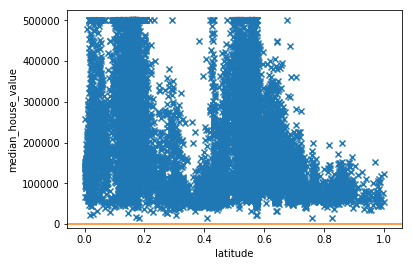

In [162]:
plot_fit(gradient_descent(0))

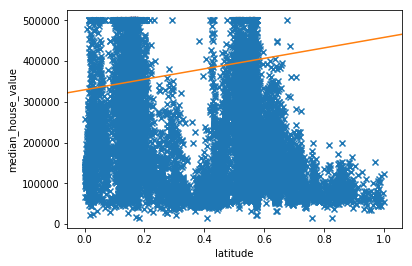

In [166]:
plot_fit(gradient_descent(1))

### Error versus iteration

Text(0,0.5,'Average error')

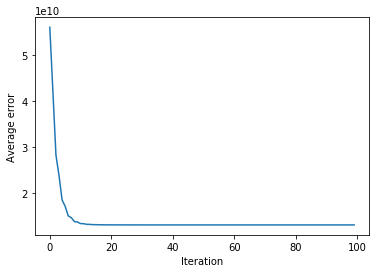

In [164]:
def gradient_descent_err(iters):
    err = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        err.append(np.mean((theta[0] * x + theta[1] - y)**2))
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y)*x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y))
    return np.array(err)

plt.plot(np.arange(0, 100), gradient_descent_err(100))
plt.xlabel("Iteration")
plt.ylabel("Average error")

Text(0,0.5,'Average error minus optimal')

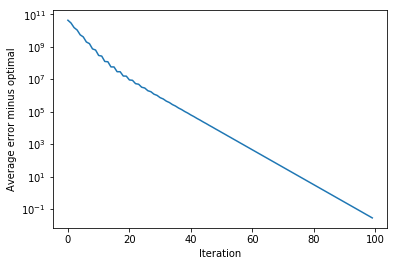

In [167]:
err = gradient_descent_err(1000)
plt.semilogy(err[:100] - err[-1])
plt.xlabel("Iteration")
plt.ylabel("Average error minus optimal")

### Visualizing parameter updates

In [172]:
def gradient_descent_params(iters):
    thetas = []
    theta = np.array([0., 0.])
    alpha = 1.0
    for t in range(iters):
        thetas.append(theta.copy())
        theta[0] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y) * x)
        theta[1] -= alpha/len(x) * 2 * sum((theta[0] * x + theta[1] - y))
    return np.array(thetas)

def err(theta):
    return np.mean((np.outer(x, theta[:,0]) + theta[:,1] - y[:,None])**2,axis=0)

KeyboardInterrupt: 

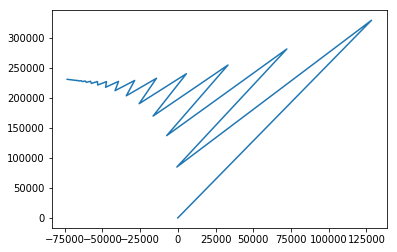

In [173]:
# thetas = gradient_descent_params(100)
# plt.plot(thetas[:,0], thetas[:,1])
# xlim, ylim =(np.array(plt.gca().get_xlim()), np.array(plt.gca().get_ylim()))
# xlim += np.array([0,0.5])
# ylim += np.array([-0.1, 0.1])

# XX,YY = np.meshgrid(np.linspace(xlim[0],xlim[1],200), np.linspace(ylim[0], ylim[1],200))
# ZZ = err(np.hstack([np.ravel(XX)[:,None], np.ravel(YY)[:,None]])).reshape(XX.shape)
# #V = np.logspace(np.log(np.min(ZZ)), np.log(np.max(ZZ)), 30)
# V = np.linspace(np.sqrt(np.min(ZZ)), np.sqrt(np.max(ZZ)), 25)**2
# plt.clf()
# plt.contour(XX,YY,ZZ, V, colors=('C0',))
# plt.plot(thetas[:,0], thetas[:,1], 'C1-x')
# plt.xlabel("theta1")
# plt.ylabel("theta2")

## Closed form solution for Linear Regression

In [190]:
# Create Data Matrices
X = np.array([data["latitude"], data["longitude"], np.ones(len(data))]).T
y = data["median_house_value"].values

X.shape
# Solve least squares
theta = np.linalg.solve(X.T @ X, X.T @ y)
print(theta)

X[:2]
# predict on new data
Xnew = np.array([[0.5674814 , 0.21115538, 1. ], [0.565356  , 0.21215139, 1. ]])
ypred = Xnew @ theta
print(ypred)

[-654474.58556193 -714942.06660849  762299.59501608]
[239933.57718427 240612.50802066]


## Linear Regression using scikit-learn

In [195]:
from sklearn.linear_model import LinearRegression

# don't include the constant term
X = np.array([data['latitude'], data['longitude']]).T
model = LinearRegression(fit_intercept = True, normalize=False)
model.fit(X, y)

#predict on new data
Xnew = np.array([[0.5674814 , 0.21115538 ], [0.565356  , 0.21215139 ]])
model.predict(Xnew)

array([239933.57718427, 240612.50802066])

In [196]:
print(model.coef_, model.intercept_)

[-654474.58556192 -714942.06660848] 762299.595016073
